In [105]:
# run python files
# !python /content/drive/MyDrive/Colab\ Notebooks/OCR/src/model_definition.py

In [170]:
import os
import random
import sys
from sklearn.model_selection import train_test_split
from importlib import reload
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/OCR/src')

import utils
import model_definition
import model_train
import data_generation

reload(utils)
reload(model_definition)
reload(model_train)
reload(data_generation)

SyntaxError: ignored

Get list of images

In [35]:
PAGE_LIST_DIR = '/content/drive/MyDrive/Colab Notebooks/OCR/data/PageImg/'
SEG_PAGE_LIST_DIR = '/content/drive/MyDrive/Colab Notebooks/OCR/data/PageSeg/'

image_list = os.listdir(PAGE_LIST_DIR)
image_list = [filename.split(".")[0] for filename in image_list]

seg_list = os.listdir(SEG_PAGE_LIST_DIR)
seg_list = [filename.split(".")[0] for filename in seg_list]

Split data into train and test

In [31]:
images = {} # dict with name of input images
seg_images = {} # dict with name of output images

images['train'], images['validation'], seg_images['train'], seg_images['validation'] = train_test_split(image_list, seg_list, test_size = 0.25, shuffle = True)

Import model

In [ ]:
model = model_definition.UNet(input_size = (512, 512, 1))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 512, 512, 64  640         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_25 (Conv2D)             (None, 512, 512, 64  36928       ['conv2d_24[0][0]']              
                                )                                                           

Train the model to segment lines in the documents

In [ ]:
model = model_train.train_model(model, PAGE_LIST_DIR, SEG_PAGE_LIST_DIR, images, seg_images, 'line_segmentation', 4, 3)

Epoch 1/3
56/56 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.6174
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/OCR/models/cp.ckpt
56/56 [==============================] - 125s 2s/step - loss: 0.6970 - accuracy: 0.6174 - val_loss: 0.6870 - val_accuracy: 0.6358
Epoch 2/3
56/56 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.6194
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/OCR/models/cp.ckpt
56/56 [==============================] - 83s 1s/step - loss: 0.6854 - accuracy: 0.6194 - val_loss: 0.6812 - val_accuracy: 0.6395
Epoch 3/3
56/56 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.6191
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/OCR/models/cp.ckpt
56/56 [==============================] - 81s 1s/step - loss: 0.6812 - accuracy: 0.6191 - val_loss: 0.6765 - val_accuracy: 0.6400


Load model

In [ ]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/OCR/models/line_segmentation/checkpoint_0.01lr_4batch')

Test the model in one image

1/1 [==============================] - 10s 10s/step


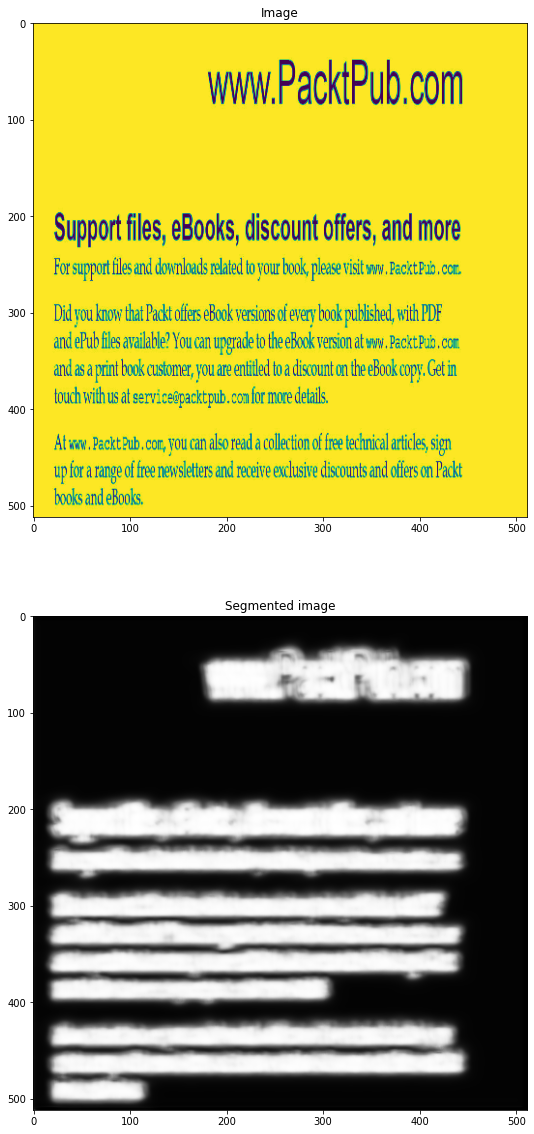

In [ ]:
img_orig = cv2.imread(f'{PAGE_LIST_DIR}4.JPG',0)
img = utils.img_preprocessing(img_orig)
img = np.expand_dims(img,axis=0)

pred = model.predict(img)

pred = np.squeeze(np.squeeze(pred,axis=0),axis=-1)

utils.show_img(cv2.resize(img_orig, (512, 512)), pred)

1/1 [==============================] - 10s 10s/step


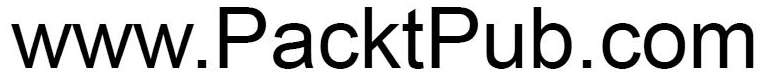

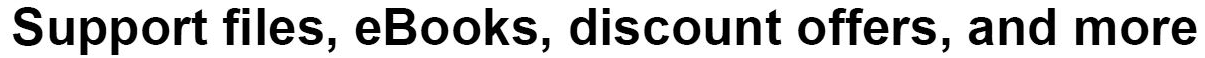

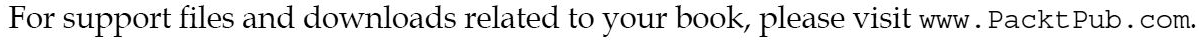

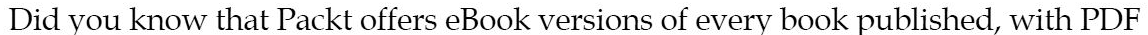

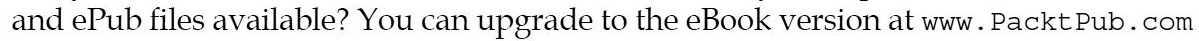

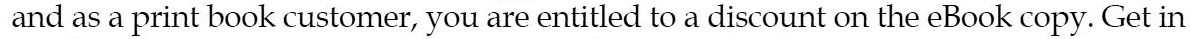

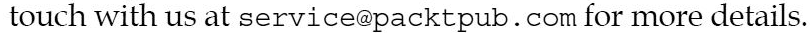

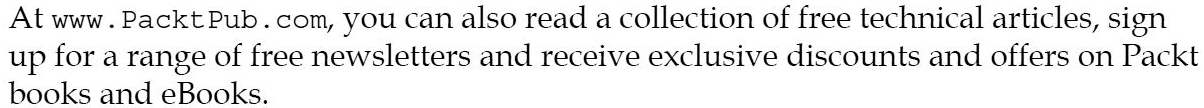

In [ ]:
bound_boxes_img = utils.get_line_segments(PAGE_LIST_DIR, '4', model)

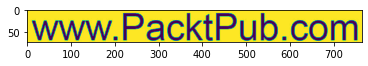

In [ ]:
plt.imshow(bound_boxes_img[0])

New model to segment words within the segmented lines

In [171]:
LINE_LIST_DIR = '/content/drive/MyDrive/Colab Notebooks/OCR/data/LineImg/'
SEG_LINE_LIST_DIR = '/content/drive/MyDrive/Colab Notebooks/OCR/data/LineSeg/'

line_list = os.listdir(LINE_LIST_DIR)
line_list = [filename.split(".")[0] for filename in line_list]

line_seg_list = os.listdir(SEG_LINE_LIST_DIR)
line_seg_list = [filename.split(".")[0] for filename in line_seg_list]

Split the data into train and testing

In [172]:
lines = {} # dict with name of input lines
seg_lines = {} # dict with name of output lines

lines['train'], lines['validation'], seg_lines['train'], seg_lines['validation'] = train_test_split(line_list, line_seg_list, test_size = 0.25, shuffle = True)

In [173]:
model = model_definition.UNet(input_size = (512, 512, 1))
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_288 (Conv2D)            (None, 512, 512, 64  640         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_289 (Conv2D)            (None, 512, 512, 64  36928       ['conv2d_288[0][0]']             
                                )                                                          

In [174]:
model = model_train.train_model(model, LINE_LIST_DIR, SEG_LINE_LIST_DIR, lines, seg_lines, 'word_segmentation', 4, 3)

Epoch 1/3
206/206 [==============================] - 294s 1s/step - loss: 0.7199 - accuracy: 0.9886 - val_loss: 0.5954 - val_accuracy: 0.9904
Epoch 2/3
206/206 [==============================] - 285s 1s/step - loss: 0.5565 - accuracy: 0.9893 - val_loss: 0.5171 - val_accuracy: 0.9904
Epoch 3/3
206/206 [==============================] - 285s 1s/step - loss: 0.4455 - accuracy: 0.9899 - val_loss: 0.0434 - val_accuracy: 0.9884


In [115]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/OCR/models/word_segmentation/checkpoint_0.0001lr_4batch')

In [ ]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/OCR/models/word_segmentation/checkpoint_0.0001lr_4batch')

1/1 [==============================] - 0s 237ms/step


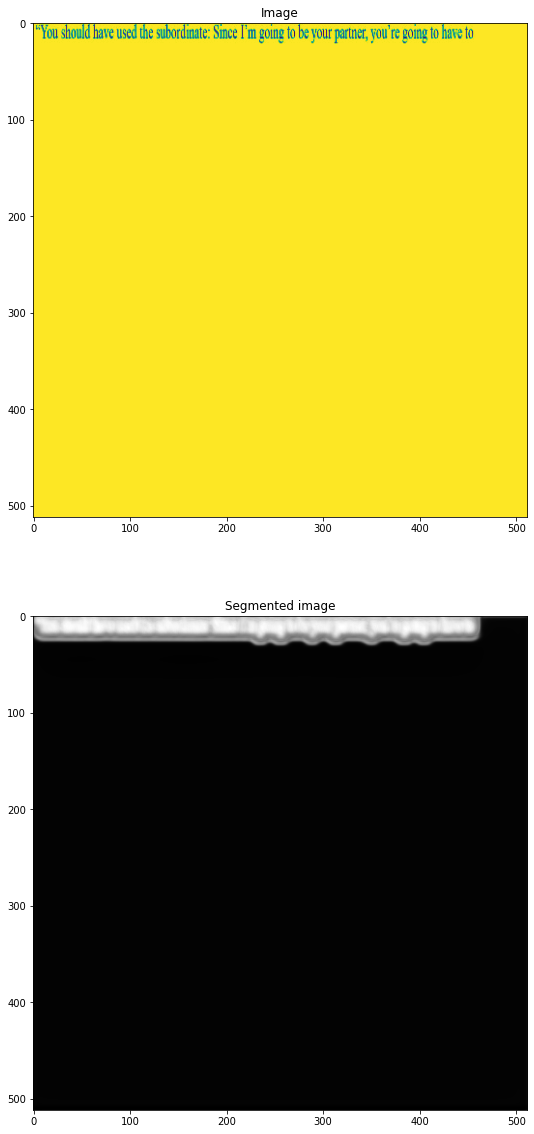

In [175]:
img_orig = cv2.imread(f'{LINE_LIST_DIR}linean0.jpg',0)
img_pad = utils.pad_img(img_orig)
img = utils.img_preprocessing(img_pad)
img = np.expand_dims(img,axis=0)

pred = model.predict(img)

pred=np.squeeze(np.squeeze(pred,axis=0),axis=-1)

utils.show_img(img_pad, pred)

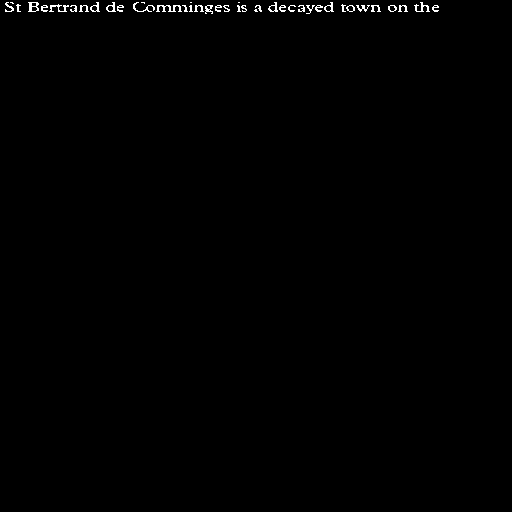

1/1 [==============================] - 0s 33ms/step


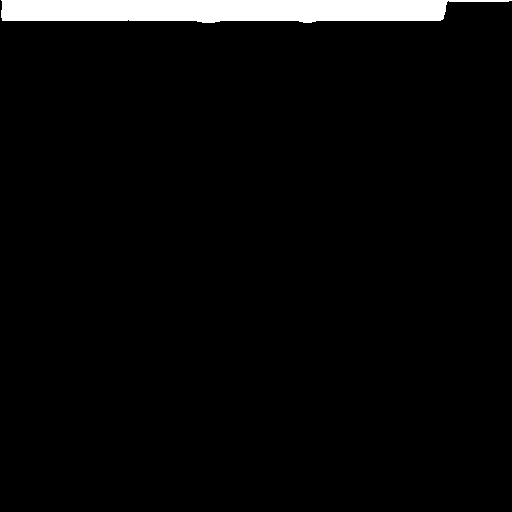

1 0 511 23


True

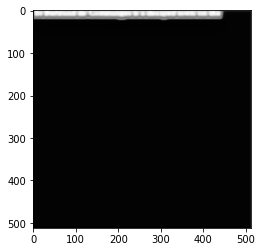

In [178]:
#Prediction.
file_test = f'{LINE_LIST_DIR}lineA0.jpg'
img = cv2.imread(f'{file_test}',0)
img = utils.pad_img(img)

ret,img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(img)
img=cv2.resize(img,(512,512))
img=np.expand_dims(img,axis=-1)
img=img/255

img=np.expand_dims(img,axis=0)

pred=model.predict(img)
pred=np.squeeze(np.squeeze(pred,axis=0),axis=-1)
plt.imshow(pred, cmap = 'gray')

plt.imsave('test_img_mask.JPG',pred)

img = cv2.imread('/content/test_img_mask.JPG',0) 

ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(img)

ori_img = cv2.imread(f'{file_test}',0)
ori_img = utils.pad_img(ori_img)
(H, W) = ori_img.shape[:2]
(newW, newH) = (512, 512)
rW = W / float(newW)
rH = H / float(newH)
ori_img_copy=np.stack((ori_img,)*3, axis=-1)

contours, hier = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

img_copy = np.stack((img,)*3, axis=-1)
cv2.drawContours(img_copy, contours, -1, (255, 255, 0), 1)
plt.imsave('contours_output.png',img_copy)

for c in contours:
  # get the bounding rect
  x, y, w, h = cv2.boundingRect(c)
  print(x, y, w, h)
  # draw a white rectangle to visualize the bounding rect
  ori_img_copy = cv2.rectangle(ori_img_copy, (int(x*rW), int(y*rH)), (int((x+w)*rW),int((y+h)*rH)), (255,0,0), 1)
  #coordinates.append([x,y,(x+w),(y+h)])

#cv2.drawContours(img, contours, -1, (255, 255, 0), 1)

cv2.imwrite("output.png",ori_img_copy)